# Excercise 2a: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train

In [3]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

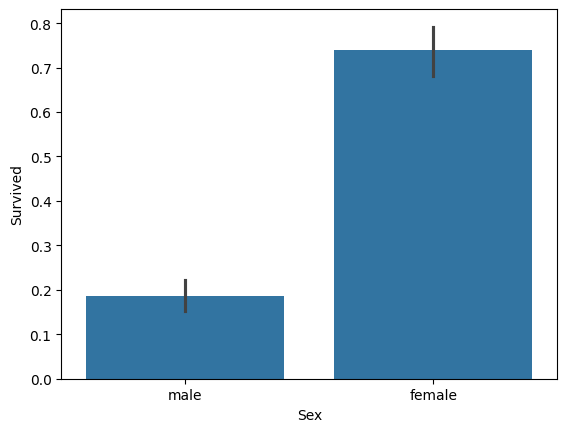

In [4]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: YES

<Axes: xlabel='Pclass', ylabel='Survived'>

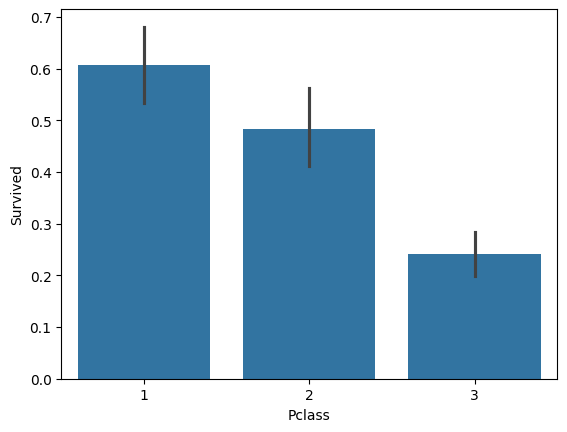

In [5]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Pclass', y='Survived', data=data)

# Question 2: Is survival related to Embarked?

Answer: Not really  
Check the correlation between Embarked Classes and Survived below.  
They are below 0.2

In [6]:
# Show the relevant statistics or visualization(s) to support your answer
# Show the correlation between the features
data = pd.get_dummies(data, columns=['Pclass', 'Embarked', 'Sex'])

<Axes: >

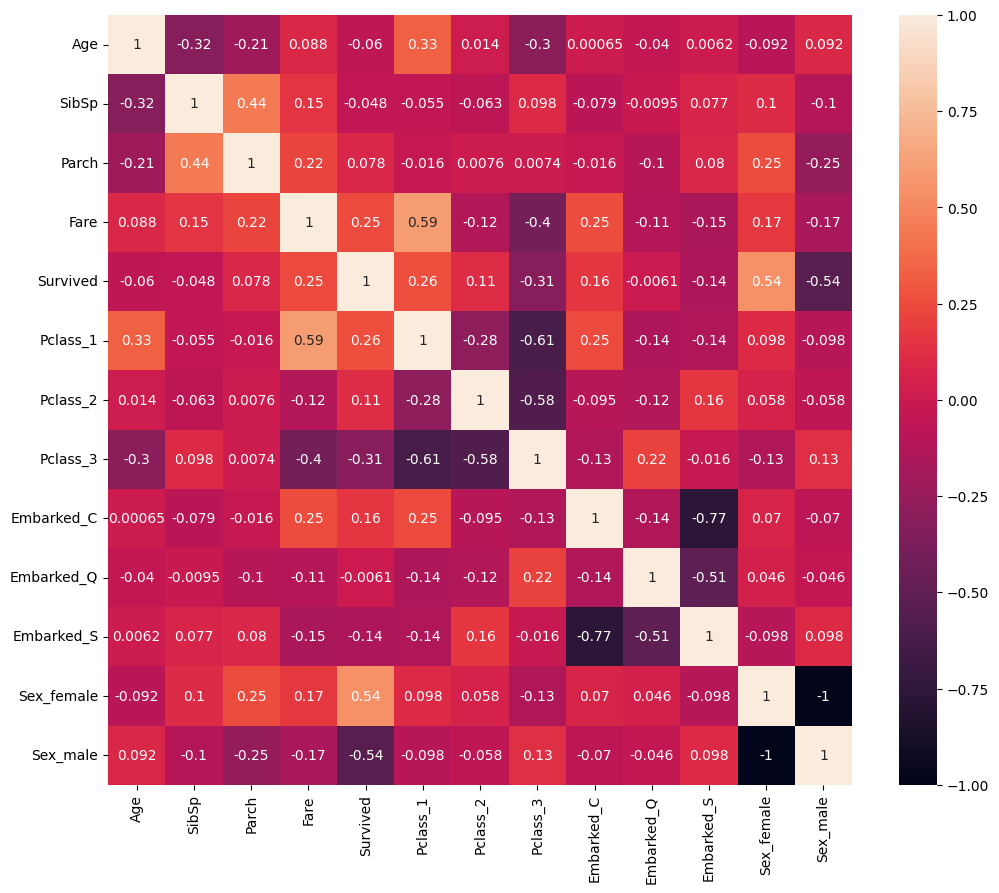

In [7]:
corr_data = data.drop(['Name'], axis=1)
correlation = corr_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True)

In [8]:
# Show the correlation of Embarked and Survived
correlation['Survived'][['Embarked_C', 'Embarked_Q', 'Embarked_S']]

Embarked_C    0.159632
Embarked_Q   -0.006097
Embarked_S   -0.142371
Name: Survived, dtype: float64

# Question 3: How is age related to survival?

Answer: There is not that much relation between them.

In [9]:
# Show the correlation of Age and Survived
correlation['Survived']['Age']

-0.059695350281932374

# Question 4: Does family size somehow affect the survival rate?

Answer: Not really

In [10]:
# Add the new column that calculate the family size with SibSp and Parch
corr_data['FamilySize'] = corr_data['SibSp'] + corr_data['Parch'] + 1
# Update the correlation
correlation = corr_data.corr()

In [11]:
# Show the correlation of FamilySize and Survived
correlation['Survived']['FamilySize']

0.0035646139159201925

# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Yes, Mrs and Miss tend to have survived, while Mr tend to be dead

In [12]:
# Extract the title from the Name column
for name in data['Name']:
    data['Title'] = data['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

print(data['Title'].value_counts())

Title
Mr          419
Miss        143
Mrs          96
Master       33
Rev           5
Dr            5
Major         2
Col           2
Mlle          2
Capt          1
Mme           1
Ms            1
Countess      1
Lady          1
Name: count, dtype: int64


In [13]:
# One-hot encoding for the Title column with 1 or 0
unique_titles = 'Title_' + data['Title'].unique()
data = pd.get_dummies(data, columns=['Title'])
# Update the correlation
corr_data = data.drop(['Name'], axis=1)
correlation = corr_data.corr()

print(correlation['Survived'][unique_titles].sort_values(ascending=False))

Title_Mrs         0.372319
Title_Miss        0.297935
Title_Master      0.076923
Title_Mlle        0.068314
Title_Countess    0.048271
Title_Lady        0.048271
Title_Mme         0.048271
Title_Ms          0.048271
Title_Major       0.013540
Title_Col         0.013540
Title_Dr          0.004096
Title_Capt       -0.029137
Title_Rev        -0.065336
Title_Mr         -0.546164
Name: Survived, dtype: float64
